## Simple Arithmetic Project
Arithmetic is a very import part of mathematics and it is a everytime  activity of human beings (, cooking two cups of rice, serving food(division)). The introduction of Artifical intelligence to the technological industry that has been simulated to imitate certain humans actions and aimed at making work easy for people. Having a machine learning model that will learning and understand the function of the basic operators in Simple arithmetic.




### Importing libraries 
For data preparation, there are different packages to be imported for easier and faster operations. 

This libraries include:

In [1]:
%matplotlib inline

# Pandas for data wrangling and some exploratory data analysis 
import pandas as pd

# Matplotlib for data visualization
import matplotlib.pyplot as plt

# Numpy is a librabry that is very efficient in mathematical tasks.
import numpy as np

## Importing data and performing Exploratory Data Analysis
Machine learning is training our model to find pattern in the datasets that influences in the target variable. This machine learning models are provided with data that are from previous but similar operations, so they get to derive patterns in the data. Here the dataset to train the model will be imported using the pandas library. 
The exploratory data analysis will follow the importation till the dataset is fit for modeling. This processes include:
    * Checking the information of each column and the type of data in each column.
    * Dropping duplicated values if there is any during the process of producing the data.
    * it is important to know the length of the dataset because a good model needs more data.
    * Making sure that none of the operators has a very few quantity, beacuse it can affect the performance of the model.
    

In [2]:
# To import the dataset containing some arithmetic operations and checking the top 5 rows
data = pd.read_csv("./data/Larger_dataset.csv")
data.head()

,First_figure,Operator,Second_figure,Result
0,20,+,8,28.000000
1,10,/,12,0.833333
2,20,+,10,30.000000
3,6,+,17,23.000000
4,17,-,14,3.000000


In [3]:
# Checking the infomation about the dataset to know what needs to be changed for a smooth modeling process.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   First_figure   800 non-null    int64  
 1   Operator       800 non-null    object 
 2   Second_figure  800 non-null    int64  
 3   Result         800 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.1+ KB


In [4]:
# Sum all duplicated values in the dataset 
data.duplicated().sum()

128

In [7]:
# Dropping duplicated values in the dataset and keeping the first occurences
data.drop_duplicates(inplace=True, keep="first")

In [8]:
# checking the quantity of data we have left after dropping duplicated values
len(data)

672

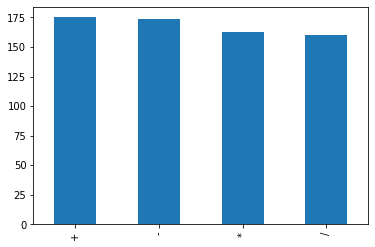

In [17]:
# The quantity of available data has a very big influence on the performance of the model... 
# Checking the distribution of each operator in the dataset
data.Operator.value_counts().plot.bar();

Since it is known that computer understands numbers better than alphabets and symbols, it is of great necessity for the dataset to be in numeric form. The Operator column in the dataset is more of categorical values because each of the operators does a different operation with the first_figure and second_figure. Pandas library has a function that helps to convert data from string type to category using the astype("category") function.

In [18]:
# This is a for loop that will search through each label(columns) in the dataset to pick out the every cell filled with a string
# Also convert the column to the codes appointed to the category each categorical value.
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()
        data[label] = pd.Categorical(content).codes 

In [19]:
# Checking the first five rows to see the changes we made to have been effected.
data.head()

,First_figure,Operator,Second_figure,Result
0,20,1,8,28.000000
1,10,3,12,0.833333
2,20,1,10,30.000000
3,6,1,17,23.000000
4,17,2,14,3.000000


### Modelling
Scikit-learn is a very useful library in machine learning, beacuse it has the a lot of inbuilt machine learning models that can be used to train structured data. In this project we will use RandmForestRegressor because it is know for amazing performaces. 

After the model has been imported the dataset will be splited into X(independent features) and y(dependent feature/target), then we use sklearn's train_test_split to split the X and y into training and test sets giving it the percentage of test sets.

From sklearn's metrics class we will import some needed evaluation functons e.g r2_score, mean_absolute_error, mean_squared_error. This metrics will help us evaluate the model and we will try to improve our model by tuning hyperparameters using GridSearchCV which makes the work easier and faster and it returns the best model from the given dictionary of hyperparameters.

In [20]:
# Importing the model (RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor

# Importing train_test_split and GridSearchCV 
from sklearn.model_selection import train_test_split, GridSearchCV

# Importing evaluation metrics to check the performance of the model.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
# random seed is set to make our results reproducible 
np.random.seed(42)

# Dropping the target(Result) column from the  dataset and save it as X for the model to learn patterns
X = data.drop("Result", axis=1)

# Assigning the target(Result) column to y
y = data.Result

# spliting the X and y datasets to training and testing sets. Giving the test_sets 20% of the total data.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# Instantiating and fitting the model to the training datasets
model = RandomForestRegressor().fit(X_train, y_train)


### Model Evaluation 
The evaluation of model is also a very important part of machine learning. The model has to be evaluated both on the training and test sets to make sure the model does not overfit or underfit on the training datasets. There are three most important evaluaton metrics used in this project which include:

   **r2_score:** This is the coefficient of determination and it is also the regression score function. A perfect model has
       a r2_score of 1 and models that has r2_score of 0.0 has just guessed(it has 50% efficiency), poor models can have
       negative r2_score
     
   **mean_absolute_error:** This calculates the variance of the predicted values and the actual value and compute the 
        mean for all rows in the test dataset. A very good model has a mean_absolute_error score of 0.0.
     
   **mean_squared_error:** Mean_squared_error squares the variance between the predicted values and the actual values 
        and compute the mean for all samples. A very good model has a mean_squared_error score of 0.0.

In [22]:
# Scoring the model on the training dataset
model.score(X_train, y_train)

0.9986969573507096

In [23]:
#scoring the model on the test datasets
model.score(X_test, y_test)

0.9956514649002176

In [24]:
# Making predictions using the model and storing in y_preds
y_preds = model.predict(X_test)

In [25]:
# Evaluating the mean absolute error made by the model while predicting using the X_test dataset
mae = mean_absolute_error(y_test, y_preds)
mae

3.3939927453491605

In [26]:
# Evaluating the model using the r2_score metrics
r2_score(y_test, y_preds)

0.9956514649002175

### Hyperparameters tuning
Each model has a series of hyperparameters that influences how they go about finding pattern and the total perfromance on the training and test data. GridSearchCV plays a big role in making hyperparameters tuning easy by taking a dictionary of hpyerparameters and lists of values to be tried. GridSearchCV makes a ombination of all the available hyperparameters and the values. The best model is then instantiated and evaluated and the best paramaters can be extracted using .best_params_ attribute.

In [21]:
grid = {
    "max_depth": [None, 5],
    "n_estimators": [10, 100, 1000],
    "max_features": ["auto", "sqrt"],
    "min_samples_leaf": [1, 2, 4],
    "n_jobs": [None, -1]
}

gs_model = GridSearchCV(model, grid, verbose=2, cv=5)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   2.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10, n_jobs=-1, total=   0.2s
[CV] max_depth=None, max_features=auto, 

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None, total=   3.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10, n_jobs=None 
[CV]  max_depth=None, max

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=-1 
[CV]  max_depth=None,

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1, total=   2.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=Non

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=5, max_features=auto,

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10, n_jobs=-1, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estima

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   3.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   3.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=None, total=   2.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=1000, n_jobs=-1 
[CV]  max_depth=5, max_features=sqrt,

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# Evaluating the performance of the tuned model on training dataset
gs_model.score(X_train, y_train)

In [23]:
#scoring the tuned model on the test dataset 
gs_model.score(X_test, y_test)

0.9951505695295906

In [24]:
# Making predictions using the tuned model
y_preds_gs = gs_model.predict(X_test)

In [25]:
# Evaluating the model's mean_absolute_error
mean_absolute_error(y_test, y_preds_gs)

2.9456616290002593

In [26]:
# Extracting the best hyperparameters when combined
gs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'n_jobs': None}

### Saving the model
After the machine learning process have been sucessful it is of no use if it is not deployed or implemented. The model has to be saved and it can be reloaded later and it has the patterns from the previous machine learning processes.
Pickle is an important library in saving models. 

In [31]:
# Importing the pickle model
import pickle
# Saving the tuned model as simple_arithmetic_model.pkl
pickle.dump(gs_model, open("simple_arithmetic_model.pkl", "wb"))